# DATAの分析

#### 交通事故リスク予測データセット

| 英語 | 日本語 |
|------|--------|
| **id** | ID |
| **road_type** | 道路タイプ |
| **num_lanes** | 車線数 |
| **curvature** | 曲率 |
| **speed_limit** | 制限速度 |
| **lighting** | 照明 |
| **weather** | 天候 |
| **road_signs_present** | 道路標識の有無 |
| **public_road** | 公道 |
| **time_of_day** | 時間帯 |
| **holiday** | 休日 |
| **school_season** | 学期期間 |
| **num_reported_accidents** | 報告事故件数 |
| **accident_risk** | 事故リスク |

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("../data/train.csv")
predict = pd.read_csv("../data/test.csv")

In [18]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,517754.0,258876.500000,149462.849975,0.0,129438.25,258876.50,388314.75,517753.0
num_lanes,517754.0,2.491511,1.120434,1.0,1.00,2.00,3.00,4.0
curvature,517754.0,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,46.112575,15.788521,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,517754.0,1.187970,0.895961,0.0,1.00,1.00,2.00,7.0
accident_risk,517754.0,0.352377,0.166417,0.0,0.23,0.34,0.46,1.0


In [12]:
predict.describe().T

,count,mean,std,min,25%,50%,75%,max
id,172585.0,604046.000000,49821.142441,517754.0,560900.00,604046.00,647192.00,690338.0
num_lanes,172585.0,2.494046,1.119148,1.0,1.00,2.00,3.00,4.0
curvature,172585.0,0.487263,0.272343,0.0,0.26,0.51,0.71,1.0
speed_limit,172585.0,46.102761,15.787077,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,172585.0,1.186059,0.897161,0.0,1.00,1.00,2.00,7.0


In [16]:
train.nunique()

id                        517754
road_type                      3
num_lanes                      4
curvature                    261
speed_limit                    5
lighting                       3
weather                        3
road_signs_present             2
public_road                    2
time_of_day                    3
holiday                        2
school_season                  2
num_reported_accidents         8
accident_risk                 98
dtype: int64

In [17]:
predict.nunique()

id                        172585
road_type                      3
num_lanes                      4
curvature                    195
speed_limit                    5
lighting                       3
weather                        3
road_signs_present             2
public_road                    2
time_of_day                    3
holiday                        2
school_season                  2
num_reported_accidents         8
dtype: int64

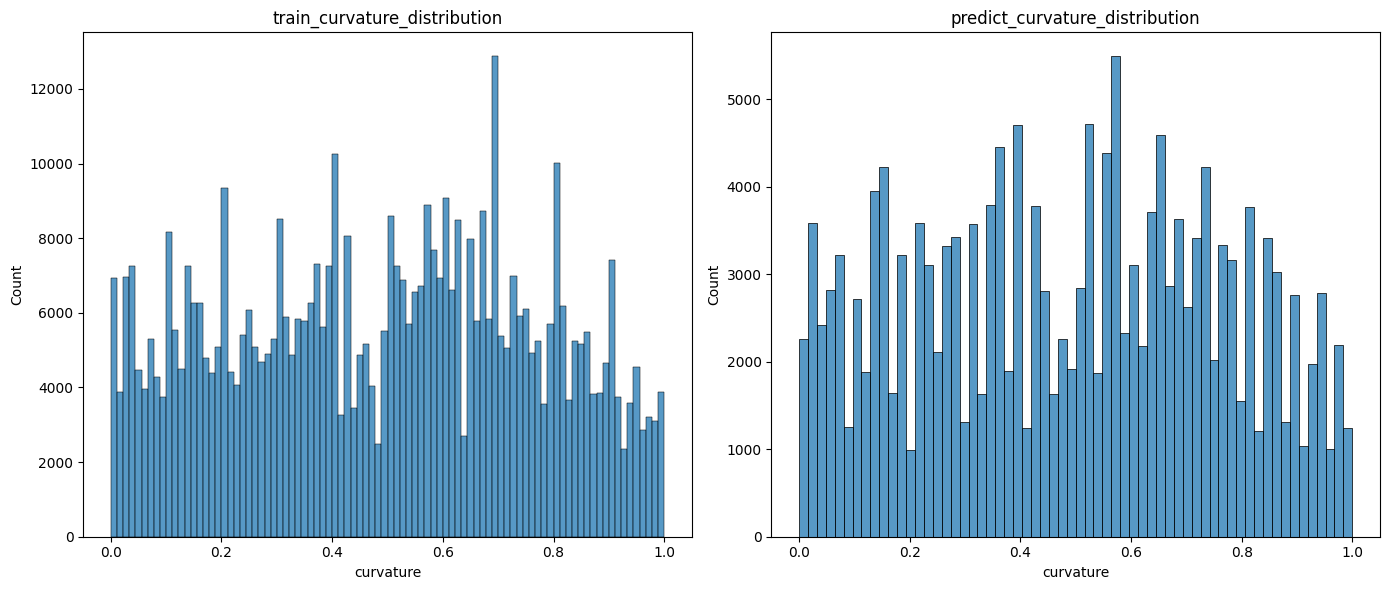

In [39]:
# subplots(行，列，figsize=(幅，高さ))
fig,axs = plt.subplots(1,2,figsize=(14,6))

# histplot(データ, kde=True(カーネル密度推定), bins=ビンの数, ax=描画する場所)
sns.histplot(train['curvature'].dropna(),ax=axs[0])
axs[0].set_title('train_curvature_distribution')

sns.histplot(predict['curvature'].dropna(),ax=axs[1])
axs[1].set_title('predict_curvature_distribution')

# tight_layout()でレイアウトを調整
plt.tight_layout()
plt.show()

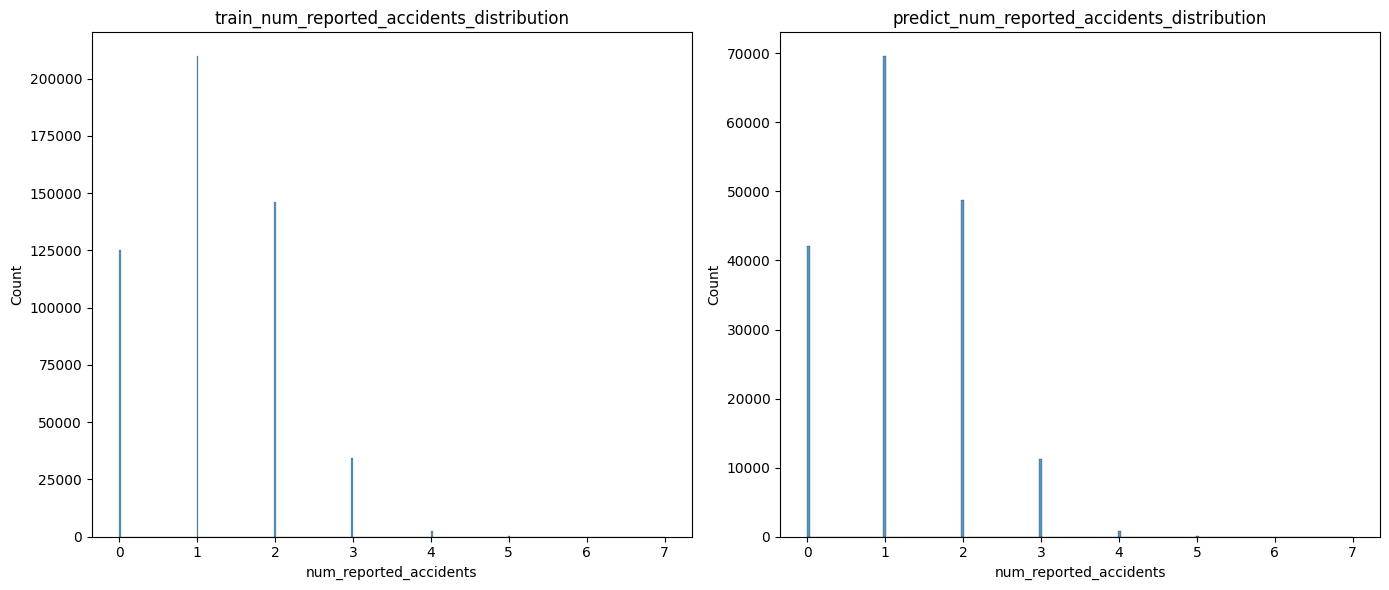

In [41]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

sns.histplot(train['num_reported_accidents'].dropna(),ax=axs[0])
axs[0].set_title('train_num_reported_accidents_distribution')

sns.histplot(predict['num_reported_accidents'].dropna(),ax=axs[1])
axs[1].set_title('predict_num_reported_accidents_distribution')

plt.tight_layout()
plt.show()

# データの相関関係の確認

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

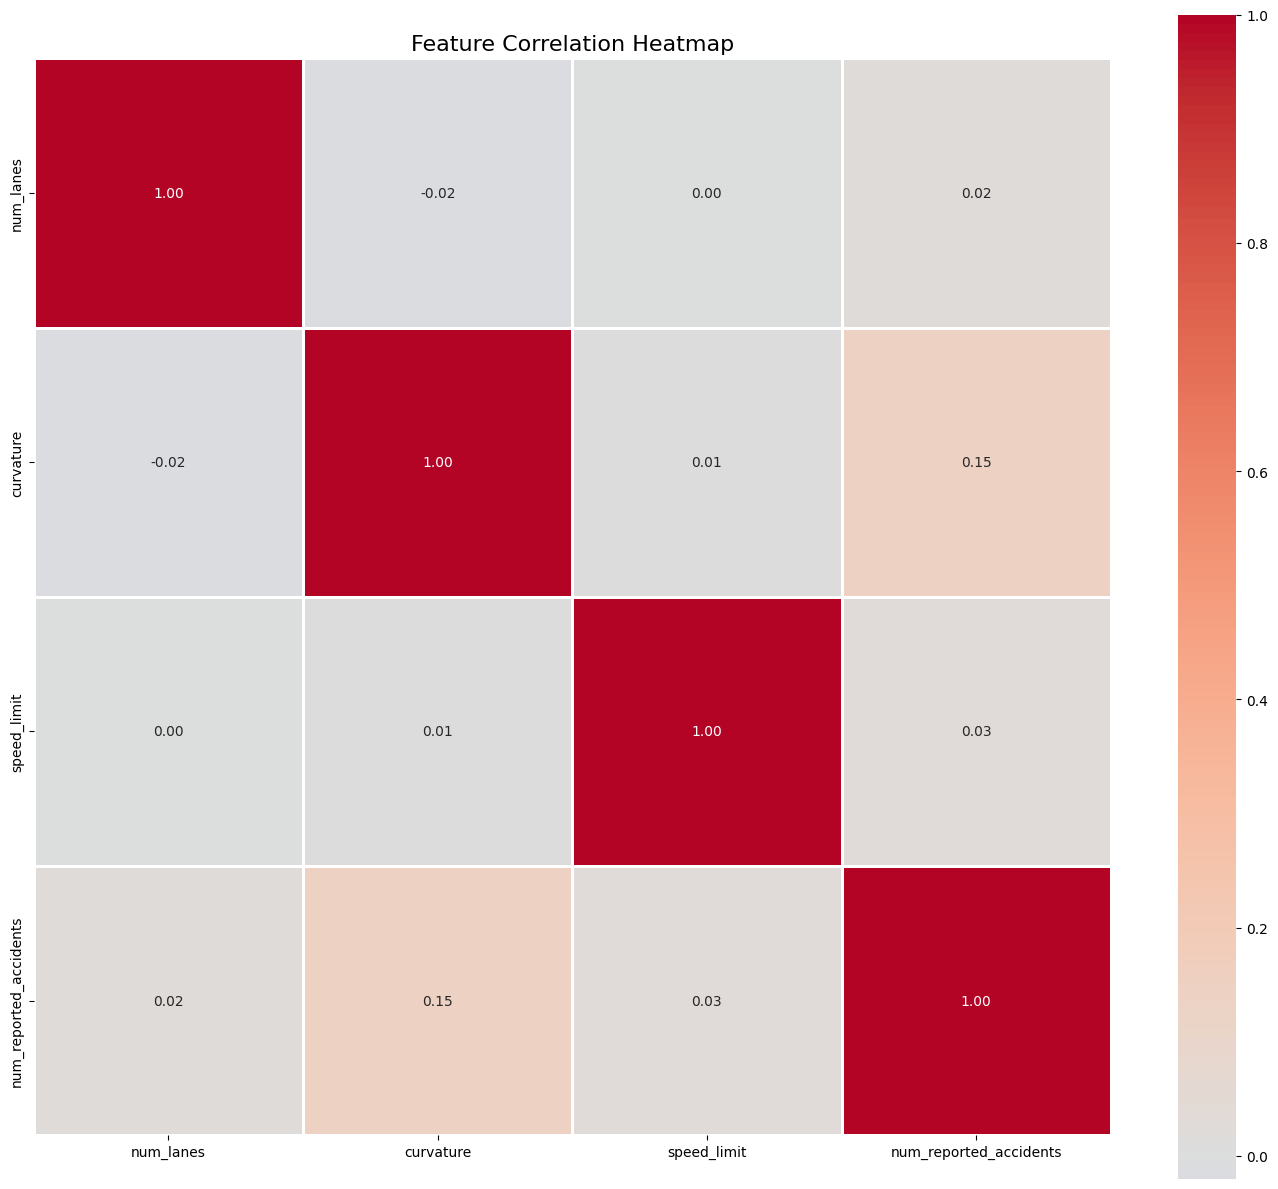

In [49]:
def plot_correlation_heatmap(df, figsize=(14, 12)):
    """
    全特徴量間の相関関係をヒートマップで表示
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

# trainデータで全特徴量間の相関関係をヒートマップで表示
corr_matrix = plot_correlation_heatmap(train.drop(columns=['id', 'accident_risk']))

欠損値はなし

異常値と見られるものはなし